In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip drive/MyDrive/aclImdb.zip

Streaming output truncated to the last 5000 lines.
  inflating: aclImdb/train/pos/9260_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._9260_7.txt  
  inflating: aclImdb/train/pos/1599_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._1599_7.txt  
  inflating: aclImdb/train/pos/2174_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2174_8.txt  
  inflating: aclImdb/train/pos/2309_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2309_9.txt  
  inflating: aclImdb/train/pos/12034_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._12034_10.txt  
  inflating: aclImdb/train/pos/11703_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._11703_9.txt  
  inflating: aclImdb/train/pos/5619_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._5619_9.txt  
  inflating: aclImdb/train/pos/2928_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2928_10.txt  
  inflating: aclImdb/train/pos/7096_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7096_10.txt  
  inflating: aclImdb/train/pos/793_9.txt  
  inf

In [ ]:
#Standard Python Library

import pandas as pd
import numpy as np
import seaborn as sns
import json
import os

#Standar NLP Pre-Processing Library

import nltk as nlp
from nltk.corpus import stopwords
import string
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB,MultinomialNB


#SK Learn and TF library for NLP NueralNet Layers
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.gaussian_process import GaussianProcessClassifier
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from tensorflow.keras.utils import plot_model 

#Logistic Regression Library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

#Naive Bayes Library
from sklearn.naive_bayes import GaussianNB

#KNN Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


#LSTM Libraries
from keras.layers import BatchNormalization, LSTM, GRU
from keras.preprocessing.sequence import pad_sequences
import keras.backend as backend
from nltk import word_tokenize, KneserNeyProbDist, SimpleGoodTuringProbDist, FreqDist, trigrams

Setting up Juypter Notebook template for Project


In [ ]:
"""
READS Text File and return all of body as a string
"""
def read_input(input_path:str) -> str:
    file_data = open(input_path , 'r')
    
    return file_data.read()

def read_directory(input_dir:str):
  data = []
  #print(input_dir)
  files = [f for f in os.listdir(input_dir)]
  #print(files)
  for f in files:
    #print("entered")
    with open (input_dir+"/"+f, "r") as myfile:
     # print(myfile.read())
      data.append(myfile.read())

  df = pd.DataFrame(data)
  return df

train_pos = read_directory('/content/aclImdb/train/pos')
train_neg = read_directory('/content/aclImdb/train/neg')
test_pos = read_directory('/content/aclImdb/test/pos')
test_neg = read_directory('/content/aclImdb/test/neg')

In [ ]:
def preprocess(doc, label, sample_size):
    data_list=[]
    for paragraphs in doc.values:
      #print(paragraphs[0])
      da = paragraphs[0].split('\n\n')
      data_set = [paragraph.strip() for paragraph in da if len(paragraph) > sample_size]
      data = [re.sub('[\W_]+', ' ', sample.lower().strip()) for sample in data_set]
      if len(data)>0:
        data_list.append(data[0])
    size = len(data_list)

    label_array = np.ones((size,)) * label
    df = pd.DataFrame({'paragraph': data_list, 'category':label_array })
    print('The total number of examples for category ' + str(label)+ ' is: ' + str(size))
    return df, size

df1_train_pos,size=preprocess(train_pos,0,100)
df2_train_neg,size2=preprocess(train_neg,1,100)
df3_test_pos,size3=preprocess(test_pos,0,100)
df4_test_neg,size4=preprocess(test_neg,1,100)


The total number of examples for category 0 is: 12498
The total number of examples for category 1 is: 12493
The total number of examples for category 0 is: 12494
The total number of examples for category 1 is: 12495


In [ ]:
df = pd.concat([df1_train_pos,df2_train_neg,df3_test_pos,df4_test_neg])

train = df['paragraph']
test = df['category']
df

,paragraph,category
0,far richer in texture and character than even ...,0.0
1,hitler the rise of evil is clearly produced b...,0.0
2,it s been so long since i ve seen this movie a...,0.0
3,caught the tail end of this movie channel surf...,0.0
4,it takes a little while to get used to nick no...,0.0
...,...,...
12490,i m just filling this comment out because i co...,1.0
12491,i can t say i was surprised at this atrocity w...,1.0
12492,maybe it s unfair to dislike a movie for what ...,1.0
12493,there are shows and films i ve seen and subseq...,1.0


In [ ]:
paragraphs = train.values
categorys = test

sentences_train, sentences_test, y_train, y_test = train_test_split(paragraphs, categorys, test_size=0.20, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(sentences_train, y_train, test_size=0.05, random_state=5)

tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_validation = tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1                          

maxlen = 150

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_validation = pad_sequences(X_validation, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

label_train = to_categorical(y_train)
label_validation = to_categorical(y_val)
label_test = to_categorical(y_test)

In [ ]:
print('Shape of x_train: ' + str(X_train.shape))
print('Shape of label_train: ' + str(label_train.shape))
print('Shape of x_validation: ' + str(X_validation.shape))
print('Shape of y_validation: ' + str(label_validation.shape))
print('Shape of x_test: ' + str(X_test.shape))
print('Shape of y_test: ' + str(label_test.shape))

Shape of x_train: (18992, 100)
Shape of label_train: (18992, 2)
Shape of x_validation: (1000, 100)
Shape of y_validation: (1000, 2)
Shape of x_test: (4999, 100)
Shape of y_test: (4999, 2)


In [ ]:
# neural network
inputs = Input(shape=(maxlen,))
embedding = Embedding(vocab_size, 100)(inputs)

import tensorflow as tf
# layer 1
conv1 = tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation='relu')(embedding)
drop1 = Dropout(0.5)(conv1)
pool1 = tf.keras.layers.MaxPooling1D(pool_size=3)(drop1)
flat1 = tf.keras.layers.Flatten()(pool1)

# layer 2
conv2 = tf.keras.layers.Conv1D(filters=10, kernel_size=2, activation='sigmoid')(embedding)
drop2 = Dropout(0.5)(conv2)
pool2 = tf.keras.layers.MaxPooling1D(pool_size=3)(drop2)
flat2 = tf.keras.layers.Flatten()(pool2)

# layer 3
conv3 = tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation='softmax')(embedding)
drop3 = Dropout(0.5)(conv3)
pool3 = tf.keras.layers.MaxPooling1D(pool_size=3)(drop3)
flat3 = tf.keras.layers.Flatten()(pool3)

# layer 4
# conv4 = tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation='relu')(embedding)
# drop4 = Dropout(0.5)(conv4)
# pool4 = tf.keras.layers.MaxPooling1D(pool_size=3)(drop4)
# flat4 = tf.keras.layers.Flatten()(pool4)

# layer 5
# conv5 = tf.keras.layers.Conv1D(filters=12, kernel_size=3, activation='tanh')(embedding)
# drop5 = Dropout(0.6)(conv5)
# pool5 = tf.keras.layers.MaxPooling1D(pool_size=3)(drop5)
# flat5 = tf.keras.layers.Flatten()(pool5)


# merge
network = tf.keras.layers.concatenate([flat1, flat2, flat3])

# interpretation
dense1 = Dense(10, activation='relu')(network)
outputs = Dense(2, activation='softmax')(dense1)
cnn_model = Model(inputs=[inputs], outputs=outputs)
# compile
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
cnn_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# summarize
print(cnn_model.summary())


Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_26 (InputLayer)          [(None, 150)]        0           []                               
                                                                                                  
 embedding_25 (Embedding)       (None, 150, 100)     9079100     ['input_26[0][0]']               
                                                                                                  
 conv1d_84 (Conv1D)             (None, 148, 10)      3010        ['embedding_25[0][0]']           
                                                                                                  
 conv1d_85 (Conv1D)             (None, 149, 10)      2010        ['embedding_25[0][0]']           
                                                                                           

In [ ]:
cnn_model.fit(X_train, label_train, batch_size=512, epochs=10, validation_data=(X_validation,label_validation))

Epoch 1/10
75/75 [==============================] - 39s 504ms/step - loss: 0.6474 - accuracy: 0.6102 - val_loss: 0.3614 - val_accuracy: 0.8530
Epoch 2/10
75/75 [==============================] - 37s 499ms/step - loss: 0.3121 - accuracy: 0.8711 - val_loss: 0.3199 - val_accuracy: 0.8675
Epoch 3/10
75/75 [==============================] - 38s 501ms/step - loss: 0.2636 - accuracy: 0.8918 - val_loss: 0.2818 - val_accuracy: 0.8875
Epoch 4/10
75/75 [==============================] - 38s 504ms/step - loss: 0.2437 - accuracy: 0.9020 - val_loss: 0.2898 - val_accuracy: 0.8830
Epoch 5/10
75/75 [==============================] - 37s 499ms/step - loss: 0.2175 - accuracy: 0.9135 - val_loss: 0.2795 - val_accuracy: 0.8855
Epoch 6/10
75/75 [==============================] - 39s 519ms/step - loss: 0.1999 - accuracy: 0.9225 - val_loss: 0.2985 - val_accuracy: 0.8755
Epoch 7/10
75/75 [==============================] - 38s 512ms/step - loss: 0.1859 - accuracy: 0.9287 - val_loss: 0.2831 - val_accuracy: 0.8805

In [ ]:
def plot_training(H, N, plotPath):
	# construct a plot that plots and saves the training history
	plt.style.use("ggplot")
	plt.figure()
	plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
	plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
	plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
	plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
	plt.title("Training Loss and Accuracy")
	plt.xlabel("Epoch #")
	plt.ylabel("Loss/Accuracy")
	plt.legend(loc="lower left")
	plt.savefig(plotPath)

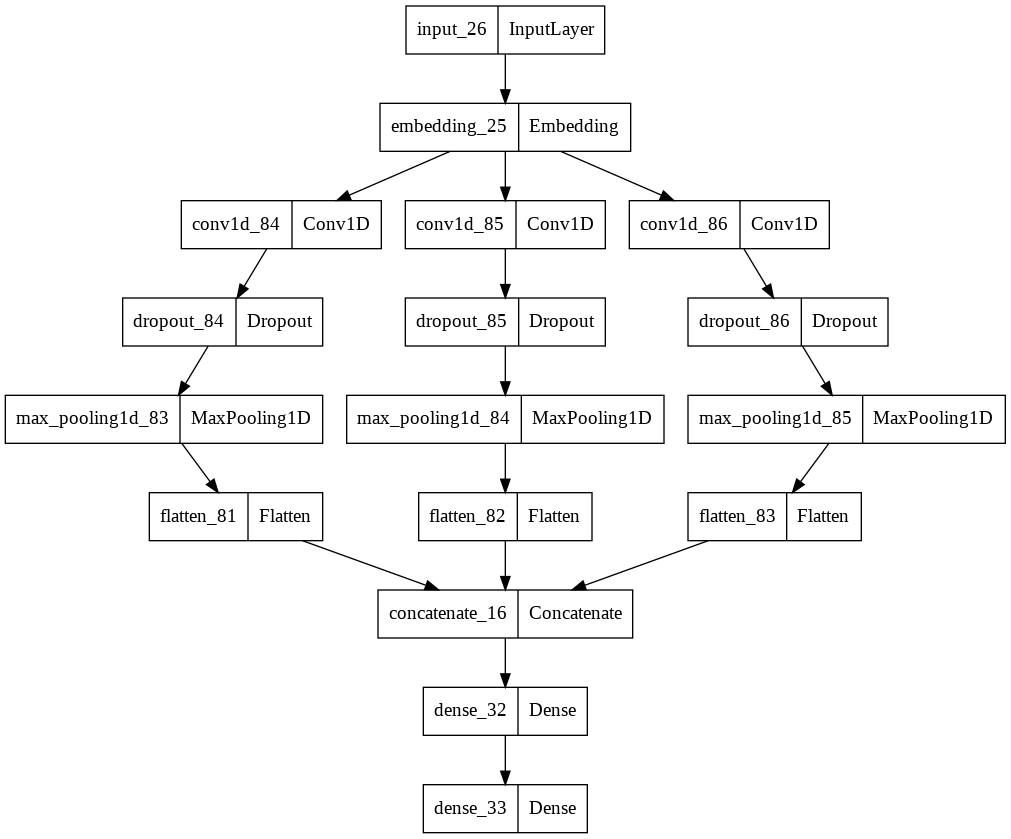

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(cnn_model)

In [ ]:
test_loss, test_acc = cnn_model.evaluate(X_test, label_test)
print(test_loss, test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.3348 - accuracy: 0.8669
0.3347502648830414 0.8669467568397522
